                                            NOTEBOOK PARA ANÁLISE DE DADOS PROJETO-FINAL-ICD

    Neste notebook são feitos os tratamentos necessários para o processamento dos dados. Aqui também são feitas diversas análises e gráficos que tratam mais profundamente sobre o conjunto de dados, todavia, já são feitas algumas conclusões sobre esses dados, tal como é obtido uma base para a resposta de algumas perguntas feitas anteriormente.

## Bibliotecas utilizadas

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## Importando o csv e o transformando em um DataFrame

In [199]:
data = pd.read_csv(r"/home/vinicius_olzon/Documents/Programacao/Projeto_Final_ICD/1950-2019.csv")
df = pd.DataFrame(data)

## Mostrando as 5 primeiras linhas do dataframe

In [200]:
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


## Análise e tratamento dos dados:
Aqui foram retiradas algumas colunas que não são úteis para as análises a seguir, não somente, foi checado a existência de algum elemento nulo ou vazio.

In [201]:
unnecessary = ["Unnamed: 0", "len", "age", "release_date"]
df = df.drop(unnecessary, axis = 1)
df.isnull().values.any()

False

In [202]:
df.isna().values.any()

False

## Medidas de centralidade e dispersão das características musicais

In [203]:
df.describe()

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy
count,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,...,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,2.837200e+04,28372.000000,28372.000000,28372.000000
mean,0.021112,0.118396,0.120973,0.057387,0.017422,0.017045,0.048681,0.076680,0.097168,0.060047,...,0.024150,0.028057,0.129389,0.030996,0.533348,0.665249,3.392347e-01,0.080049,0.532864,0.569875
std,0.052370,0.178684,0.172200,0.111923,0.040670,0.041966,0.106095,0.109538,0.181303,0.123329,...,0.051025,0.058473,0.181143,0.071652,0.173218,0.108434,3.267143e-01,0.211245,0.250972,0.244385
min,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,...,0.000284,0.000284,0.000284,0.000289,0.005415,0.000000,2.811248e-07,0.000000,0.000000,0.000000
25%,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,...,0.000957,0.000975,0.001144,0.000993,0.412975,0.595364,3.423598e-02,0.000000,0.329143,0.380361
50%,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,...,0.001645,0.001595,0.005263,0.001754,0.538612,0.679050,2.259028e-01,0.000085,0.539365,0.580567
75%,0.004049,0.192608,0.197793,0.065842,0.010002,0.004785,0.042301,0.132136,0.088765,0.055101,...,0.025498,0.026622,0.235113,0.032622,0.656666,0.749026,6.325298e-01,0.009335,0.738252,0.772766
max,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,...,0.618073,0.594459,0.981424,0.958810,0.993502,1.000000,1.000000e+00,0.996964,1.000000,1.000000


## Boxplots para a demonstração do comportamento das variáveis.

Boxplot sobre a violência verbal das músicas

<AxesSubplot:ylabel='violence'>

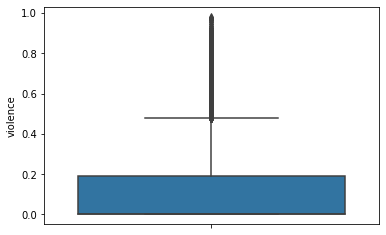

In [204]:
sns.boxplot(y = "violence",data = df)

Boxplot sobre a dançabilidade das músicas

<AxesSubplot:ylabel='danceability'>

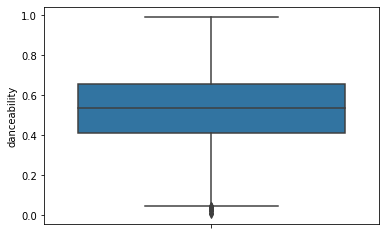

In [205]:
sns.boxplot(y = "danceability", data=df)

Boxplot sobre a positividade das músicas

<AxesSubplot:ylabel='valence'>

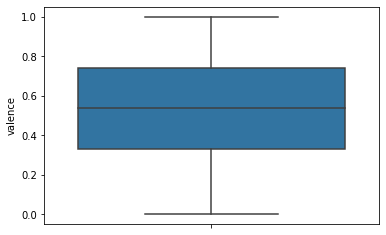

In [206]:
sns.boxplot(y = "valence", data=df)

Boxplot sobre a energia das músicas

<AxesSubplot:ylabel='energy'>

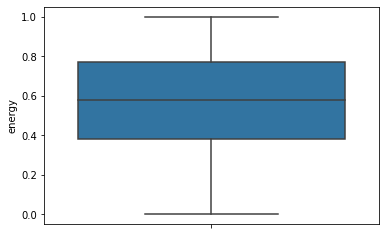

In [207]:
sns.boxplot(y = "energy", data=df)

Boxplot da relação da violência verbal de cada gênero musical

<AxesSubplot:xlabel='genre', ylabel='violence'>

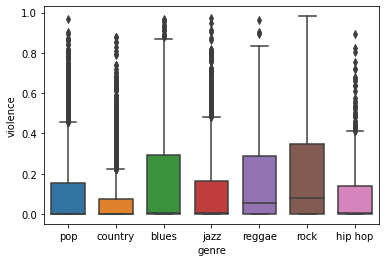

In [208]:
sns.boxplot(data = df, x = 'genre', y = 'violence', whis = 2, width  = 0.7)

## Índices de correlação entre as características musicais

Aqui é possível analisar quais características musicais tem mais/menos correlação entre si.

In [209]:
corr = df.corr().round(decimals = 4)
corr

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy
dating,1.0000,-0.1074,-0.0737,0.0345,0.0270,0.0098,0.0346,-0.0575,-0.0205,-0.0092,...,-0.0633,0.0043,-0.0129,0.0258,0.0372,0.0006,0.0220,-0.0211,0.0781,0.0037
violence,-0.1074,1.0000,-0.1868,-0.1243,-0.0279,-0.0335,-0.1554,-0.0759,-0.1597,-0.1591,...,0.0718,-0.0644,-0.2211,-0.0814,-0.0972,0.1286,-0.1896,0.1056,-0.0700,0.2049
world/life,-0.0737,-0.1868,1.0000,-0.1162,-0.0535,-0.0395,-0.0719,-0.0698,-0.2114,-0.1286,...,0.0230,-0.0423,-0.1595,-0.0534,-0.0713,-0.0492,0.0379,-0.0167,-0.0864,-0.0764
night/time,0.0345,-0.1243,-0.1162,1.0000,-0.0088,-0.0135,-0.0396,-0.0420,-0.1168,-0.0705,...,-0.0619,-0.0190,-0.1039,-0.0002,0.0057,-0.0002,-0.0113,-0.0001,0.0311,0.0125
shake the audience,0.0270,-0.0279,-0.0535,-0.0088,1.0000,-0.0049,-0.0390,-0.0555,0.0738,-0.0426,...,-0.0351,0.0034,-0.0753,0.0127,0.0548,0.0985,-0.1003,-0.0137,0.0523,0.1042
family/gospel,0.0098,-0.0335,-0.0395,-0.0135,-0.0049,1.0000,-0.0125,-0.0632,-0.0062,0.0102,...,0.0032,-0.0215,-0.0508,-0.0063,0.0323,-0.0433,0.0485,-0.0048,0.0459,-0.0393
romantic,0.0346,-0.1554,-0.0719,-0.0396,-0.0390,-0.0125,1.0000,-0.0200,-0.1586,-0.0410,...,-0.0622,0.0005,-0.0446,-0.0221,-0.0777,-0.1451,0.2221,-0.0260,-0.0372,-0.1976
communication,-0.0575,-0.0759,-0.0698,-0.0420,-0.0555,-0.0632,-0.0200,1.0000,-0.0778,-0.0793,...,-0.0909,-0.0691,-0.0059,-0.0092,0.0069,0.0026,0.0125,-0.0447,0.0002,-0.0210
obscene,-0.0205,-0.1597,-0.2114,-0.1168,0.0738,-0.0062,-0.1586,-0.0778,1.0000,-0.1338,...,-0.0765,0.0095,-0.2661,-0.0754,0.2734,0.1380,-0.1580,-0.0029,0.1535,0.1567
music,-0.0092,-0.1591,-0.1286,-0.0705,-0.0426,0.0102,-0.0410,-0.0793,-0.1338,1.0000,...,0.0180,-0.0268,-0.1148,-0.0452,-0.0413,-0.1350,0.1621,0.0086,-0.0030,-0.1458


In [210]:
corr.style.background_gradient(cmap='coolwarm')

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy
dating,1.000000,-0.107400,-0.073700,0.034500,0.027000,0.009800,0.034600,-0.057500,-0.020500,-0.009200,-0.078000,-0.088500,-0.063300,0.004300,-0.012900,0.025800,0.037200,0.000600,0.022000,-0.021100,0.078100,0.003700
violence,-0.107400,1.000000,-0.186800,-0.124300,-0.027900,-0.033500,-0.155400,-0.075900,-0.159700,-0.159100,-0.018400,-0.001700,0.071800,-0.064400,-0.221100,-0.081400,-0.097200,0.128600,-0.189600,0.105600,-0.070000,0.204900
world/life,-0.073700,-0.186800,1.000000,-0.116200,-0.053500,-0.039500,-0.071900,-0.069800,-0.211400,-0.128600,-0.080300,-0.017500,0.023000,-0.042300,-0.159500,-0.053400,-0.071300,-0.049200,0.037900,-0.016700,-0.086400,-0.076400
night/time,0.034500,-0.124300,-0.116200,1.000000,-0.008800,-0.013500,-0.039600,-0.042000,-0.116800,-0.070500,-0.042800,-0.044800,-0.061900,-0.019000,-0.103900,-0.000200,0.005700,-0.000200,-0.011300,-0.000100,0.031100,0.012500
shake the audience,0.027000,-0.027900,-0.053500,-0.008800,1.000000,-0.004900,-0.039000,-0.055500,0.073800,-0.042600,-0.036600,-0.078600,-0.035100,0.003400,-0.075300,0.012700,0.054800,0.098500,-0.100300,-0.013700,0.052300,0.104200
family/gospel,0.009800,-0.033500,-0.039500,-0.013500,-0.004900,1.000000,-0.012500,-0.063200,-0.006200,0.010200,-0.006800,-0.069300,0.003200,-0.021500,-0.050800,-0.006300,0.032300,-0.043300,0.048500,-0.004800,0.045900,-0.039300
romantic,0.034600,-0.155400,-0.071900,-0.039600,-0.039000,-0.012500,1.000000,-0.020000,-0.158600,-0.041000,-0.098900,-0.001000,-0.062200,0.000500,-0.044600,-0.022100,-0.077700,-0.145100,0.222100,-0.026000,-0.037200,-0.197600
communication,-0.057500,-0.075900,-0.069800,-0.042000,-0.055500,-0.063200,-0.020000,1.000000,-0.077800,-0.079300,-0.148000,-0.154100,-0.090900,-0.069100,-0.005900,-0.009200,0.006900,0.002600,0.012500,-0.044700,0.000200,-0.021000
obscene,-0.020500,-0.159700,-0.211400,-0.116800,0.073800,-0.006200,-0.158600,-0.077800,1.000000,-0.133800,0.052200,-0.133200,-0.076500,0.009500,-0.266100,-0.075400,0.273400,0.138000,-0.158000,-0.002900,0.153500,0.156700
music,-0.009200,-0.159100,-0.128600,-0.070500,-0.042600,0.010200,-0.041000,-0.079300,-0.133800,1.000000,-0.013200,0.033100,0.018000,-0.026800,-0.114800,-0.045200,-0.041300,-0.135000,0.162100,0.008600,-0.003000,-0.145800


Aqui foi feita a análise dos índices de correlação com exclusão da diagonal principal, haja vista que ela faz correlação consigo mesma, logo não faria sentido analisar esses dados. No caso, ela foi preenchida com o valor de 0, após isso, foi feito a análise a partir dos novos valores.

In [211]:
np.fill_diagonal(corr.values, 0)
corr

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy
dating,0.0000,-0.1074,-0.0737,0.0345,0.0270,0.0098,0.0346,-0.0575,-0.0205,-0.0092,...,-0.0633,0.0043,-0.0129,0.0258,0.0372,0.0006,0.0220,-0.0211,0.0781,0.0037
violence,-0.1074,0.0000,-0.1868,-0.1243,-0.0279,-0.0335,-0.1554,-0.0759,-0.1597,-0.1591,...,0.0718,-0.0644,-0.2211,-0.0814,-0.0972,0.1286,-0.1896,0.1056,-0.0700,0.2049
world/life,-0.0737,-0.1868,0.0000,-0.1162,-0.0535,-0.0395,-0.0719,-0.0698,-0.2114,-0.1286,...,0.0230,-0.0423,-0.1595,-0.0534,-0.0713,-0.0492,0.0379,-0.0167,-0.0864,-0.0764
night/time,0.0345,-0.1243,-0.1162,0.0000,-0.0088,-0.0135,-0.0396,-0.0420,-0.1168,-0.0705,...,-0.0619,-0.0190,-0.1039,-0.0002,0.0057,-0.0002,-0.0113,-0.0001,0.0311,0.0125
shake the audience,0.0270,-0.0279,-0.0535,-0.0088,0.0000,-0.0049,-0.0390,-0.0555,0.0738,-0.0426,...,-0.0351,0.0034,-0.0753,0.0127,0.0548,0.0985,-0.1003,-0.0137,0.0523,0.1042
family/gospel,0.0098,-0.0335,-0.0395,-0.0135,-0.0049,0.0000,-0.0125,-0.0632,-0.0062,0.0102,...,0.0032,-0.0215,-0.0508,-0.0063,0.0323,-0.0433,0.0485,-0.0048,0.0459,-0.0393
romantic,0.0346,-0.1554,-0.0719,-0.0396,-0.0390,-0.0125,0.0000,-0.0200,-0.1586,-0.0410,...,-0.0622,0.0005,-0.0446,-0.0221,-0.0777,-0.1451,0.2221,-0.0260,-0.0372,-0.1976
communication,-0.0575,-0.0759,-0.0698,-0.0420,-0.0555,-0.0632,-0.0200,0.0000,-0.0778,-0.0793,...,-0.0909,-0.0691,-0.0059,-0.0092,0.0069,0.0026,0.0125,-0.0447,0.0002,-0.0210
obscene,-0.0205,-0.1597,-0.2114,-0.1168,0.0738,-0.0062,-0.1586,-0.0778,0.0000,-0.1338,...,-0.0765,0.0095,-0.2661,-0.0754,0.2734,0.1380,-0.1580,-0.0029,0.1535,0.1567
music,-0.0092,-0.1591,-0.1286,-0.0705,-0.0426,0.0102,-0.0410,-0.0793,-0.1338,0.0000,...,0.0180,-0.0268,-0.1148,-0.0452,-0.0413,-0.1350,0.1621,0.0086,-0.0030,-0.1458


Abaixo estão os índices de correlação mais/menos fortes após o tratamento.

In [212]:
corr.max()

dating                      0.0781
violence                    0.2049
world/life                  0.0379
night/time                  0.0345
shake the audience          0.1042
family/gospel               0.0485
romantic                    0.2221
communication               0.0125
obscene                     0.2734
music                       0.1621
movement/places             0.0805
light/visual perceptions    0.0692
family/spiritual            0.0718
like/girls                  0.0467
sadness                     0.0924
feelings                    0.0405
danceability                0.4936
loudness                    0.7731
acousticness                0.2221
instrumentalness            0.1056
valence                     0.4936
energy                      0.7731
dtype: float64

In [213]:
corr.min()

dating                     -0.1074
violence                   -0.2211
world/life                 -0.2114
night/time                 -0.1243
shake the audience         -0.1003
family/gospel              -0.0693
romantic                   -0.1976
communication              -0.1541
obscene                    -0.2661
music                      -0.1591
movement/places            -0.1480
light/visual perceptions   -0.1541
family/spiritual           -0.0909
like/girls                 -0.0748
sadness                    -0.2661
feelings                   -0.0814
danceability               -0.1235
loudness                   -0.5397
acousticness               -0.7200
instrumentalness           -0.1325
valence                    -0.1729
energy                     -0.7200
dtype: float64

## K_Means

- Antes, foi feita a filtração de algumas colunas do dataframe que não seriam úteis para tal análise:

In [214]:
unecessary = ["genre", "lyrics", "dating", "violence", "world/life", "night/time", "shake the audience", "family/gospel",
"sadness", "feelings", "danceability", "loudness", "instrumentalness", "valence", "topic",
"romantic", "communication", "obscene", "music", "movement/places", "light/visual perceptions", "family/spiritual", "like/girls"]
df.drop(unecessary, axis = "columns", inplace = True)


In [215]:
df

,artist_name,track_name,acousticness,energy
0,mukesh,mohabbat bhi jhoothi,0.997992,0.137110
1,frankie laine,i believe,0.954819,0.263240
2,johnnie ray,cry,0.840361,0.139112
3,pérez prado,patricia,0.083935,0.743736
4,giorgos papadopoulos,apopse eida oneiro,0.975904,0.394375
...,...,...,...,...
28367,mack 10,10 million ways,0.062549,0.695686
28368,m.o.p.,ante up (robbin hoodz theory),0.004607,0.797791
28369,nine,whutcha want?,0.104417,0.767761
28370,will smith,switch,0.007027,0.885882


A dsitribuição desses dados:

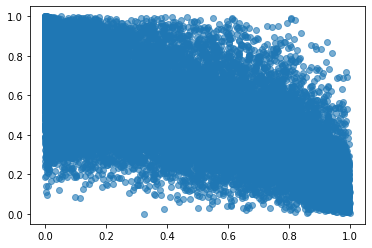

In [216]:
plt.scatter(df["acousticness"], df["energy"], alpha = 0.6)

Primeiramente foi definido a quantia de "Clusters", ou grupos, desejados para fazer o agrupamento:

In [217]:
km = KMeans(n_clusters = 4)

Abaixo já é exibido uma lista esses grupos separados de acordo com a similaridade entre si:

In [218]:
y_predicted = km.fit_predict(df[["acousticness", "energy"]])
y_predicted

array([2, 2, 2, ..., 3, 3, 0], dtype=int32)

Após isso foi inserida uma nova coluna com esses valores no DataFrame:

In [219]:
df["cluster"] = y_predicted
df.head()

,artist_name,track_name,acousticness,energy,cluster
0,mukesh,mohabbat bhi jhoothi,0.997992,0.137110,2
1,frankie laine,i believe,0.954819,0.263240,2
2,johnnie ray,cry,0.840361,0.139112,2
3,pérez prado,patricia,0.083935,0.743736,3
4,giorgos papadopoulos,apopse eida oneiro,0.975904,0.394375,2


Com os agrupamentos feitos, foi possível fazer um gráfico de dispersão mostrando esse diferentes grupos:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


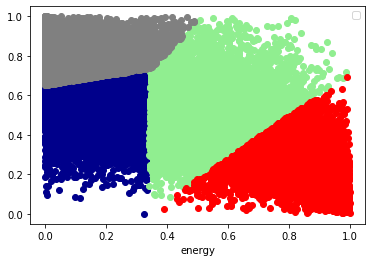

In [220]:
df1 = df[df["cluster"] == 0 ]
df2 = df[df["cluster"] == 1 ]
df3 = df[df["cluster"] == 2 ]
df4 = df[df["cluster"] == 3 ]

plt.scatter(df1["acousticness"], df1["energy"], color = "darkblue")
plt.scatter(df2["acousticness"], df2["energy"], color = "lightgreen")
plt.scatter(df3["acousticness"], df3["energy"], color = "red")
plt.scatter(df4["acousticness"], df4["energy"], color = "grey")

plt.xlabel("acousticness")
plt.xlabel("energy")

plt.legend()

Se atente a duas coisas:
- Os agrupamentos podem não ser os melhores possíveis
- As escalas do eixo x com o eixo y não são proporcionais

Então, foi utilizada a função MinMaxScaler() para tratar esses dados de tal forma que variem de 0 até 1.

In [221]:
scaler = MinMaxScaler()

scaler.fit(df[["acousticness"]])
df["acousticness"] = scaler.transform(df[["acousticness"]])

scaler.fit(df[["energy"]])
df["energy"] = scaler.transform(df[["energy"]])

Após o tratamento, foi feito novamente o gráfico com esses novos valores.

In [222]:
y_predicted = km.fit_predict(df[["acousticness", "energy"]])

In [223]:
df["cluster"] = y_predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


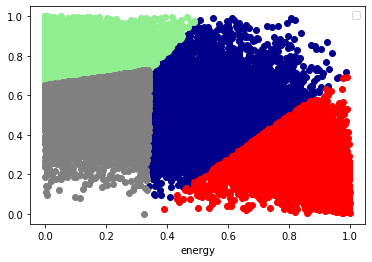

In [224]:
df1 = df[df["cluster"] == 0 ]
df2 = df[df["cluster"] == 1 ]
df3 = df[df["cluster"] == 2 ]
df4 = df[df["cluster"] == 3 ]

plt.scatter(df1["acousticness"], df1["energy"], color = "darkblue")
plt.scatter(df2["acousticness"], df2["energy"], color = "lightgreen")
plt.scatter(df3["acousticness"], df3["energy"], color = "red")
plt.scatter(df4["acousticness"], df4["energy"], color = "grey")

plt.xlabel("acousticness")
plt.xlabel("energy")

plt.legend()

Com o gráfico feito, e com o eixo y proporcional ao eixo x, foi inserido os centróides no gráfico para a melhor visualização.

Abaixo estão as coordenadas dos 4 centróides que serãi inseridos no gráfico:

In [225]:
km.cluster_centers_

array([[0.54377758, 0.51858631],
       [0.06520312, 0.8311136 ],
       [0.83885935, 0.24671946],
       [0.1370227 , 0.52188573]])

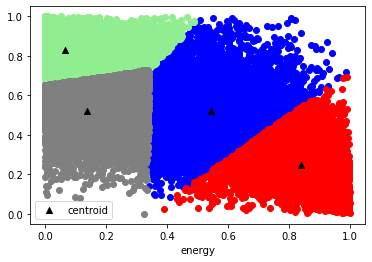

In [226]:
df1 = df[df["cluster"] == 0 ]
df2 = df[df["cluster"] == 1 ]
df3 = df[df["cluster"] == 2 ]
df4 = df[df["cluster"] == 3 ]

plt.scatter(df1["acousticness"], df1["energy"], color = "blue")
plt.scatter(df2["acousticness"], df2["energy"], color = "lightgreen")
plt.scatter(df3["acousticness"], df3["energy"], color = "red")
plt.scatter(df4["acousticness"], df4["energy"], color = "grey")

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = "black", marker = "^", label = "centroid")

plt.xlabel("acousticness")
plt.xlabel("energy")

plt.legend()

Todavia, após todo este processo, fica a dúvida: "Será que o melhor número de agrupamentos possíveis é realmente 4?"
- Para isso, existe o "Elbow Method", ou método do cotovelo, que define o melhor número para K, em que K representa a quantia de agrupamentos.

Agora para definir o melhor valor para K (Elbow_method):

In [227]:
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[["energy", "acousticness"]])
    sse.append(km.inertia_)

Observe os valores abaixo da lista dos erros médios quadrados, em que há um rápido declinio sobre os dois primeiros valores, e em que a partir do terceiro valor todos os outros subsequentes seguem um padrão praticamente igual.
- Dessa forma, o valor indicado para K é igual a 2.

In [228]:
sse

[4722.815539040059,
 1501.1632562266043,
 1011.0461117793234,
 713.437112665764,
 582.719213745399,
 478.9228993763483,
 405.0120155907335,
 353.1330372128084,
 314.54850998240573]

Não somente, o gráfico abaixo, apesar de não ser tão claro nesse caso, demonstra esse comportamento:

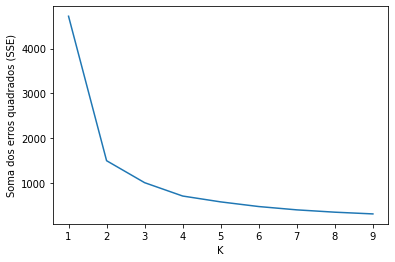

In [229]:
plt.xlabel("K")
plt.ylabel("Soma dos erros quadrados (SSE)")
plt.plot(k_range, sse)

    Logo, o gráfico mais adequado para esse conjunto de dados não é igual ao que foi feito anteriormente, o ideal é feito com o valor de K igual a 2, em que existem dois conjuntos de músicas que se assemelham ao se tratar sobre a energia relacionada com a acústica de cada música.

Então, é preciso reajustar alguns dados:

Definiir a quantia de agrupamentos para 2:

In [230]:
km = KMeans(n_clusters = 2)

Dividir o DataFrame em 2 conjuntos:

In [231]:
y_predicted = km.fit_predict(df[["acousticness", "energy"]])

Redesignar esses novos grupos na coluna "cluster" no DataFrame:

In [232]:
df["cluster"] = y_predicted

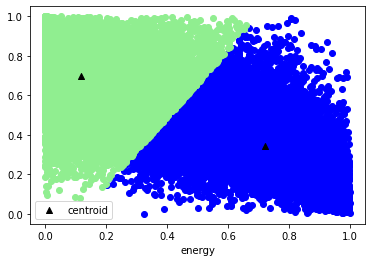

In [233]:
df1 = df[df["cluster"] == 0 ]
df2 = df[df["cluster"] == 1 ]

plt.scatter(df1["acousticness"], df1["energy"], color = "blue")
plt.scatter(df2["acousticness"], df2["energy"], color = "lightgreen")

plt.xlabel("acousticness")
plt.xlabel("energy")

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = "black", marker = "^", label = "centroid")

plt.legend()

Após o gráfico correto ter sido feito, é preciso checar se tais grupos realmente têm características em comum:

In [234]:
df = df.sort_values(by="cluster", ascending=False)
clstr0 = df[df["cluster"] == 0]
clstr1 = df[df["cluster"] == 1]

In [235]:
clstr0.describe()

,acousticness,energy,cluster
count,10410.000000,10410.000000,10410.0
mean,0.720662,0.345288,0.0
std,0.176490,0.170076,0.0
min,0.203814,0.000000,0.0
25%,0.585341,0.220196,0.0
50%,0.740964,0.330309,0.0
75%,0.869478,0.454437,0.0
max,1.000000,0.991992,0.0


In [236]:
clstr1.describe()

,acousticness,energy,cluster
count,17962.000000,17962.000000,17962.0
mean,0.118175,0.700036,1.0
std,0.131775,0.177198,0.0
min,0.000000,0.080652,1.0
25%,0.009718,0.571558,1.0
50%,0.064758,0.712704,1.0
75%,0.194778,0.845841,1.0
max,0.659638,1.000000,1.0
